# Basic operations

In [1]:
# imports
from scipy import stats
import matplotlib.pyplot as plt
# import numpy as np
import math
# import random as rd
import pandas as pd
import probscale
import seaborn

## Chapter 3

In [13]:
x = [2, 6, 8, 12, -19, 30, 0, -5, 7, 16, 23, 38, -29, 35, 1, -28]
# sum(x)/len(x)
y = [9, 2, -4, 42, 9, 23, -3, -6, 5, 22, -14, 51, 65, 3, -16, -3]
# sum(y)/len(y)

# set dataframes
df_x = pd.DataFrame(x, columns=["val"])
df_y = pd.DataFrame(y, columns=["val"])

# statistical summaries
# df_x.describe()
# df_y.describe()

#### Central tendancy

In [14]:
# get mean
df_x.mean()

In [15]:
# get median
df_x.median()

In [16]:
# get mode
if len(df_x.mode()) == len(df_x):
    print("No mode")
else:
    df_x.mode()

No mode


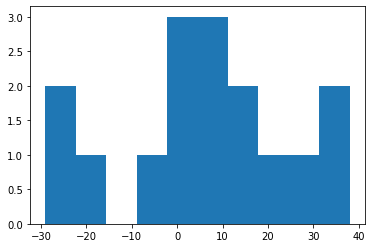

In [17]:
# ugly histogram
plt.hist(df_x["val"])
plt.show()

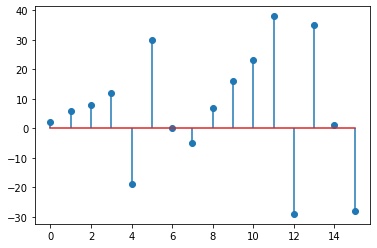

In [18]:
# ugly stem and leaf plot
plt.stem(df_x["val"])
plt.show()

In [19]:
# sorting your stuff
df_x.sort_values("val", ascending=False)

,val
11,38
13,35
5,30
10,23
9,16
3,12
2,8
8,7
1,6
0,2


In [20]:
# quantiles
p = [0.1, 0.25, 0.5, 0.75, 0.95]
df_x.quantile(q=p)

,val
0.10,-23.50
0.25,-1.25
0.50,6.50
0.75,17.75
0.95,35.75


In [21]:
# IQR
stats.iqr(df_x)

19.0

In [22]:
df_x.var()

In [23]:
df_x.std()

#### median absolute deviation

In [24]:
df_x.mad()

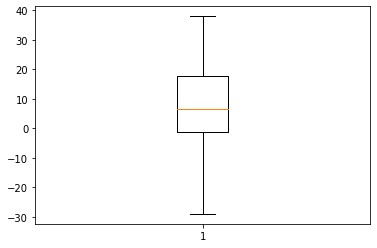

In [25]:
plt.boxplot(df_x)
plt.show()

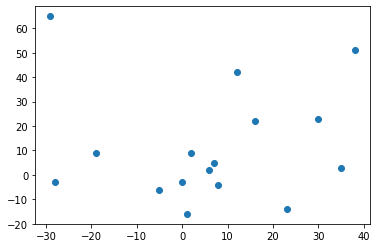

In [26]:
plt.scatter(df_x, df_y)
plt.show()

#### percentile plot

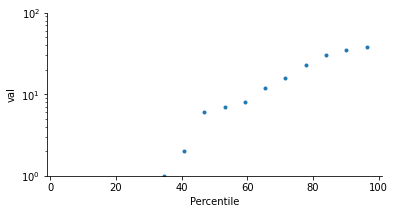

In [27]:
# complex percentle plot, position and val used later
position, val = probscale.plot_pos(df_x.sort_values("val"))
position *= 100
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(position, val, marker='.', linestyle='none', label='val')
ax.set_xlabel('Percentile')
ax.set_ylabel('val')
ax.set_yscale('log')
ax.set_ylim(bottom=1, top=100)
seaborn.despine()

#### quantile plot

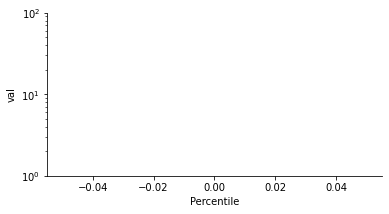

In [28]:
# complex quantile plot
quantile = stats.norm.ppf(position)
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(quantile, val, marker='.', linestyle='none', label='val')
ax.set_xlabel('Percentile')
ax.set_ylabel('val')
ax.set_yscale('log')
ax.set_ylim(bottom=1, top=100)
seaborn.despine()

# Probability and Bayes

#### Homework 1 samples

#### 4.16
Conditional probability - P(A|B) = P(AB)/P(B)

Additive law - P(A union B) = P(A) + P(B) - P(AB)

Multiplicative law - if A and B are independent, P(AB) = P(A)P(B)

Test for independence - P(A|B) = P(A) = P(AB)/P(B)


	Blood				
    Race/Ethnicity	O	A	B	AB	Total
    White	        36.0%	32.2%	8.8%	3.2%	80.2%
    Black	        7%	2.9%	2.5%	0.5%	5.9%
    Asian	        1.7%	1.2%	1.0%	0.3%	4.2%
    Others	        1.5%	0.8%	0.3%	0.1%	2.7%
    Total	        46.2%	37.1%	12.6%	4.1%	100.0%

In [6]:
# a. A volunteer blood donor walks into a Red Cross blood donation center.
# What is the probability she will be Asian and have Type O blood?
pato = 0.017
print(f"P(Asian and Type O) = {pato}")

# b. What is the probability that a white donor will not have Type A blood?
pw = 0.802
pwa = 0.322
pwna = pw - pwa
pnagw = pwna / pw
print(f"P(Not A | White) = {round(pnagw,4)}")

# c. What is the probability that an Asian donor will have either Type A or Type B blood?
pa = 0.042
paa = 0.012
pab = 0.01
paaob = paa + pab

paobga = paaob / pa
print(f"P(A or B | Asian) = {round(paobga,4)}")

# d. What is the probability that a donor will have neither Type A nor Type AB blood?
po = 0.462
pb = 0.126
pob = po + pb

print(f"P(not A or AB) = {round(pob,4)}")

P(Asian and Type O) = 0.017
P(Not A | White) = 0.5985
P(A or B | Asian) = 0.5238
P(not A or AB) = 0.588


#### Bayes theorem

P(B|A) = P(A|B)P(B)/P(A)

Of a finance company’s loans, 1% are defaulted (not completely repaid). The company routinely runs credit checks on all loan applicants. It finds that 30% of defaulted loans went to poor risks, 40% to fair risks, and 30% to good risks. Of the nondefaulted loans, 10% went to poor risks, 40% to fair risks, and 50% to good risks. Use Bayes’ Formula to calculate the probability that a poor-risk loan will be defaulted. 

In [30]:
# posterior means we have been given a probability this proves independence and why they are fair
pfd = 0.4
pfnd = 0.4
pd = 0.01
pnd = 0.99

pdf = (pfd * pd) / ((pfd * pd) + (pfnd * pnd))
print(f"P(Default|Fair) = {round(pdf,3)}")

# show dependent probability on Bayes
ppd = 0.3
ppnd = 0.1

pdp = (ppd * pd) / ((ppd * pd) + (ppnd * pnd))
print(f"P(Default|Poor) = {round(pdp,4)}")

P(Default|Fair) = 0.01
P(Default|Poor) = 0.0294


# Discrete distributions

In [31]:
# imports
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math
import random as rd
import pandas as pd
import probscale
import seaborn

#### create random df

In [32]:
# create df of random integers 0-9
r_vals = pd.DataFrame(np.random.randint(0, 9,size=1000), columns=list('v'))
r_vals

,v
0,5
1,4
2,7
3,2
4,5
...,...
995,3
996,5
997,3
998,0


#### binomial distribution --> successes in n independent, identical trials

Consider the following experiment:
1) The experiment consists of n identical and independent trials.
2) Each trial has one of two possible outcomes (success or failure).
3) Probability of success in each trial will be denoted as p (1-p = 
probability of failure).

Let x = # successes in the n trials.
Then the random variable x has a Binomial Distribution 

In [33]:
# math formula
p = 0.2
n = 15

## when x = value in question
# set numerator
numer = math.factorial(n)

# set test values
test_val = 15
test_val_diff = n - test_val

# set variables for calculation
total_combos = numer / (math.factorial(test_val) * math.factorial(test_val_diff))
success = p**test_val
fail = (1 - p)**test_val_diff

# perform calculation defined by formula
prob = total_combos * success * fail
print(prob)


## when x >= value in question (or any other type of summary)
# re/set probability
prob = 0
prob_sum = 0
# define test value, select less than test value. to include n, submit n + 1
test_val = 7
# set variable to loop through all iterations through selection
i = 0

while i <= test_val:
    test_val_diff = n - i

    # set variables for calculation
    total_combos = numer / (math.factorial(i) * math.factorial(test_val_diff))
    success = p**i
    fail = (1-p)**test_val_diff

    # calculate probability defined by formula
    prob = total_combos * success * fail
    # print (f"Prob of {i} = {round(prob, 2)}")
    prob_sum += prob
    # print(f"{i}, {comb}, {success}, {fail}, {prob}")
    i += 1

print(prob_sum)

3.276800000000003e-11
0.9957602502901768


3.276800000000003e-11
0.995760250290176
0.3518378954260484
0.6019767907450877


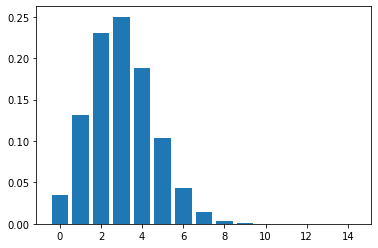

In [34]:
# scipy stats functions
# set range for distribution, n+1 for extra context
r_vals = np.arange(0, n)

# mean and variance
mean, var = stats.binom.stats(n,p)

# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_vals]

# print("r\tp(r)")
# for i in range(n + 1):
#     print(str(r_vals[i]) + "\t" + str(dist[i]))
    
plt.bar(r_vals, dist)
plt.show()


# p(x = 15)
print(stats.binom.pmf(k=15, n=n, p=p))
# p(x <= 7)
print(stats.binom.cdf(k=7, n=n, p=p))
# p(x > 3)
print(1 - stats.binom.cdf(k=3, n=n, p=p))
# p(x >= 3)
print(1 - stats.binom.cdf(k=2, n=n, p=p))

#### poisson distribution --> people in a line
used for understanding counts in designated time period. usually matches one-to-one. 

important to remember that our x values are what we are reporting ON. This does not predict how long you will be waiting. To do that you will need an exponential distribution (in Other distributions)

the below example is a 1-to-1 match of a single 30 minute time period

In [35]:
# math
# variable setup
mins = 30
customers = 6
# customers per minute (needs to be in same time space as question)
# C for problem, mu for python, lambda for stats, then definition of customers per minute
C = mu = lam = customers
# set desired time interval (usually 1, which is why we are getting customers per minute)
t = 1

## when x = test_val
test_val = 0
prob = (((lam*t)**test_val) * (math.e**(-lam*t))) / math.factorial(test_val)
print(prob)

## when x <= test val
# re/set probability
prob = 0
# set test value
test_val = 3
prob_sum = 0
i = 0
# calculate probability
while i <= test_val:
    prob = (((lam*t)**i) * (math.e**(-lam*t))) / math.factorial(i)
    # print(prob)
    i += 1
    prob_sum += prob

print(prob_sum)

0.0024787521766663594
0.15120388277664792


0.0024787521766663585
0.15120388277664784


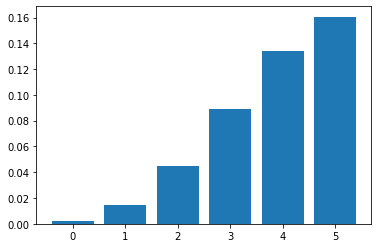

In [36]:
# scipy library functions
# set range for distribution, n+1 for extra context
r_vals = np.arange(0, customers)

# mean and variance
mean, var = stats.poisson.stats(lam)

# list of pmf values
dist = [stats.poisson.pmf(r, lam) for r in r_vals]

# print("r\tp(r)")
# for i in range(n + 1):
#     print(str(r_vals[i]) + "\t" + str(dist[i]))
    
plt.bar(r_vals, dist)
plt.show()


# p(x = 0)
print(stats.poisson.pmf(k= 0, mu=lam))
# p(x <= 3)
print(stats.poisson.cdf(k=3, mu=lam))

#### normal distribution

In [0]:
# tbd

# Continuous distributions

In [38]:
# imports
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math
# import random as rd
import pandas as pd
import probscale
import seaborn

#### geometric distribution --> failures until first success

Consider the following experiment:
1) Each trial has one of two possible outcomes (success or failure).
2) Probability of success in each trial will be denoted as p (1-p = probability of failure)
3) Let x = # trials until the first success (includes the first success) 
   
Then the random variable x has a Geometric Distribution (Sometimes geometric random variable is defined as # failures until first success)

No combination since only 1 success

People with o-negative blood are called “universal donors” 
because o-negative blood can be given to anyone.  Only about 
6% of the people have o-negative blood.  If donors line up at 
random for a blood drive

In [39]:

# ## for x <= test value
# p = 0.06 # 1 success
# pn = 1 - p
# x = 4
# prob = 0

# mean = 1 / p
# variance = sig_sq = (1 - p) / p ** 2

# # x-1 failures
# fail = pn ** (x - 1)
# prob = p * fail
# print(prob)

## for x <= test value
# set variables
p = 0.06 # 1 success
pn = 1 - p
x = 9
# i starts at 1 because you can't have a probability of zero, else prob = 0
i = 1
prob_sum = 0

mean = 1 / p
variance = sig_sq = (1 - p) / p ** 2

while i <= x:
    # x-1 failures
    fail = pn ** (i - 1)
    prob = p * fail
    prob_sum += prob
    i += 1

print(f"mean: {mean}")
print(prob_sum)

mean: 16.666666666666668
0.4270051977713832


0.4270051977713833
Mean:16.666666666666668
Variance:261.1111111111111


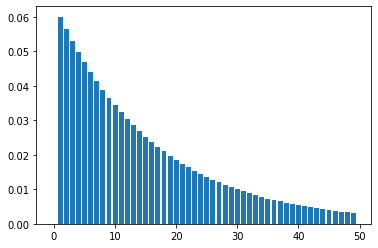

In [40]:
# scipy library functions
# set range for distribution, n+1 for extra context
r_vals = np.arange(0, 50)

mean, var = stats.geom.stats(p)

# list of pmf values
dist = [stats.geom.pmf(r, p) for r in r_vals]

# print("r\tp(r)")
# for i in range(n + 1):
#     print(str(r_vals[i]) + "\t" + str(dist[i]))
    
plt.bar(r_vals, dist)
plt.show()

print(stats.geom.cdf(x, p))

print(f"Mean:{mean}\nVariance:{var}")

#### hypergeometric distribution --> successes in non-independent trials

The binomial and Poisson distributions require independent trials, or 
at least approximately independent.  In instances where the 
population is fairly small and the sampling is done without 
replacement, the condition of independence will not hold.  In this 
case, the hypergeometric distribution may be useful. 

In [41]:
# math setup
# set variables
# total pop
N = 30
# sample size
n = 10
# number of success in pop
X = 12
# number of success in sample
y = 8 

## when x = test val
nx_dif = N-X
ny_dif = n-i

comb_sel_suc = math.factorial(nx_dif) / (math.factorial(ny_dif) * math.factorial(nx_dif - ny_dif))
comb_of_suc = math.factorial(X) / (math.factorial(i) * math.factorial(X - i))
comb_of_samp_of_pop = math.factorial(N) / (math.factorial(n) * math.factorial(N - n))

prob = (comb_sel_suc * comb_of_suc) / comb_of_samp_of_pop
# print(f"Prob of {i} = {round(prob, 9)}")

print(prob)

# P(8 or more women being laid off by chance)
# k-1 to include 8 in cdf selection
# using distribution function
# 1 - hypergeom.cdf(y, N, X, n)

# re/set probability
prob = 0
prob_sum = 0

# set value to loop
i = 0

while i < y:
    nx_dif = N-X
    ny_dif = n-i

    comb_sel_suc = math.factorial(nx_dif) / (math.factorial(ny_dif) * math.factorial(nx_dif - ny_dif))
    comb_of_suc = math.factorial(X) / (math.factorial(i) * math.factorial(X - i))
    comb_of_samp_of_pop = math.factorial(N) / (math.factorial(n) * math.factorial(N - n))

    prob = (comb_sel_suc * comb_of_suc) / comb_of_samp_of_pop
    # print(f"Prob of {i} = {round(prob, 9)}")
    prob_sum += prob
    i += 1

print(1 - prob_sum)

2.1967038458792583e-06
0.002654716597745188


0.0026547165977424125


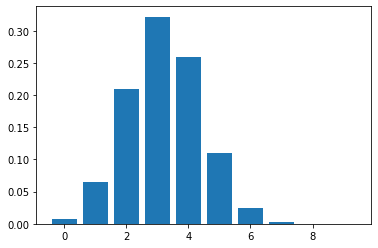

In [50]:
# scipy library functions
# set range for distribution, n+1 for extra context
r_vals = np.arange(0, n)

# list of pmf values
dist = [stats.hypergeom.pmf(k=r, M=N, n=y, N=X) for r in r_vals]

# print("r\tp(r)")
# for i in range(n + 1):
#     print(str(r_vals[i]) + "\t" + str(dist[i]))
    
plt.bar(r_vals, dist)
plt.show()

# same example as above
print(1 - stats.hypergeom.cdf(y-1, N, n, X))

# print(f"Mean:{mean}\nVariance:{var}")

#### exponential distribution --> waiting times, decay rates

The exponential distribution is a continuous distribution and is used 
to measure time between two occurrences of an event.

In [88]:

## exponential density function
fu = lam * math.e ** (-lam*x)
mean = 1 / lam

## exponentional probability function
# set variables
mins = 20
bus = 1
lam = 1/mins

# re/set probability
prob = 0
# set values
x = 10
prob = 1 - math.e**-(lam*x)

print(1-prob)

# c. You will wait between 8 and 15 mins >> P(y<=7)
# using distribution function
# dist.cdf(7)

# re/set probability
prob = 0

# set values
x = 7

prob = 1 - math.e**-(lam*x)

print(prob)

0.6065306597126334
0.29531191028128656


In [29]:
# can't seem to find scipy functions?

# Confidence intervals

In [1]:
# imports
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import math
# import random as rd
import pandas as pd
# import probscale
import seaborn as sb

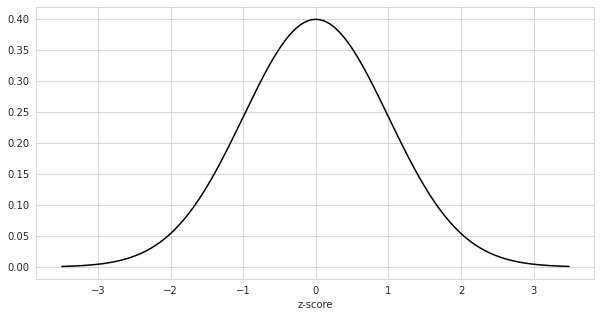

In [2]:
data = np.arange(-3.5, 3.5, 0.01)

pdf = st.norm().pdf(data)

sb.set_style('whitegrid')
fix, ax = plt.subplots(figsize=(10,5))
ax.plot(data, pdf, color='k')
ax.set_xlabel('z-score')
# ax.legend()
plt.show()

In [4]:
z_95p_one_tail = st.norm.ppf(.975)
z_95p_one_tail

1.959963984540054

### Normal distribution

In [19]:
# setup variables
n = 50 
s = 7.1 # mg of caffeine
t = 1 # time in hours
y_bar = x_bar = 110 # mg of caffeine 

prod = s / math.sqrt(n)
alpha = 0.95
two_tail = True

if two_tail:
    diff = (1 - alpha)  / 2
    alpha += diff

z_score = st.norm.ppf(alpha)

sampling_error = z_score * (s / math.sqrt(n))
std_error_of_mean = s / math.sqrt(n)

lower = x_bar - (z_score * prod)
upper = x_bar + (z_score * prod)

print(f"95% confidence interval: ({round(lower, 4)}, {round(upper, 4)})")
print(f"Sampling error: {round(sampling_error, 4)}")
print(f"Standard error: {round(std_error_of_mean, 4)}")

95% confidence interval: (108.032, 111.968)
Sampling error: 1.968
Standard error: 1.0041


### Students T distribution

In [20]:
# setup variables
n = 20
x_bar = 82.05 # % net margin
s = 10.88
df = n - 1

prod = math.sqrt(s**2 / n)

alpha = 0.99
two_tail = True

if two_tail:
    diff = (1 - alpha)  / 2
    alpha += diff

t_score = round(st.t.ppf(q=alpha, df=df), 4)
# print(t_score)

sampling_error = t_score * (s / math.sqrt(n))
std_error_of_mean = s / math.sqrt(n)

lower = x_bar - (t_score * prod)
upper = x_bar + (t_score * prod)

print(f"99% confidence interval: ({round(lower, 4)}%, {round(upper, 4)}%)")
print(f"Sampling error: {round(sampling_error, 4)}")
print(f"Standard error: {round(std_error_of_mean, 4)}")

99% confidence interval: (75.0899%, 89.0101%)
Sampling error: 6.9601
Standard error: 2.4328


### Finding sample size

In [21]:
# setup variables
sd = 13 # cm
w = 3 # cm

# calculations
# n = z[alpha/2] * sigma^2 / w^2

alpha = 0.99

two_tail = True
if two_tail:
    diff = (1 - alpha)  / 2
    alpha += diff

# get z at alpha / 2
z_score = round(st.norm.ppf(alpha), 4)
# print(z_score)

# calculate 
n = z_score**2 * (sd**2 / w**2)

# round up to include "decimal" sample
print(f"Total recommended subjects: {math.ceil(n)}")

Total recommended subjects: 125


### Binomial distribution confidence interval

In [22]:
# setup values
# does not have aids
fals_pos = 591
pos_neg = 9409

# has aids
neg_pos = 7
pos_pos = 993

total_no_aids = pos_neg + fals_pos  
total_aids = neg_pos + pos_pos

total = total_aids + total_no_aids
# print(f"{total_aids}, {total_no_aids}, {total}")

# a. Place a 99% confidence interval on the proportion of false positives produced by the test.
# false positive = positive but no aids

p = fals_pos / total
n = total

prod = math.sqrt( (p * (1 - p)) / n)

alpha = 0.99
two_tail = True

if two_tail:
    diff = (1 - alpha)  / 2
    alpha += diff

z = st.norm.ppf(alpha)

lower = p - (z * prod)
upper = p + (z * prod)

print(f"99% confidence interval: ({round(lower, 4)}, {round(upper, 4)})")

99% confidence interval: (0.0482, 0.0593)


# Hypothesis testing

In [1]:
import math
import scipy.stats as st

# Two sample confidence intervals

In [2]:
import math
import scipy.stats as st
import numpy as np

 ### Estimating the difference between two independent means-large samples

Suppose we have two independent populations with 

Population 1 having mean = m1 and std dev = s1

Population 2 having mean = m2 and std dev = s2 

We get a sample of size n1 from population 1 and a sample of size n2 from population 2.

We want to know about m1 - m2 .

If you wanted to make a guess at m1 - m2, x1 - x2 would be a reasonable choice.

In [3]:
# z example

y_bar1 = 2.4
y_bar2 = 3.1
n1 = 100
n2 = 100
var1 = 1.44
var2 = 2.64

alpha = 0.10 / 2  # --> two-tail
crit_val = round(abs(st.norm.ppf(alpha)), 4)
print(f"Critical value: {crit_val}")

y_diff = y_bar1 - y_bar2
# print(f"Mean diff: {y_diff}")

prod = crit_val * math.sqrt( (var1/n1) + (var2/n2) )
# print(f"Product: {prod}")

lower = round(y_diff - prod, 4)
upper = round(y_diff + prod, 4)

print(f"{round((1 - alpha) * 100, 0)}% confidence interval: ({lower}, {upper})")

Critical value: 1.6449
95.0% confidence interval: (-1.0323, -0.3677)


### Small sample Confidence Intervals for difference in two independent means - equal variance

In [4]:
# t example

y_bar1 = 5.0
y_bar2 = 4.86
n1 = 5
n2 = 5
var1 = 0.025
var2 = 0.013

df = n1 + n2 - 2
# print(f"Degrees of freedom: {df}")

alpha = 0.05 / 2  # --> two-tail
crit_val = round(abs(st.t.ppf(alpha, df)), 4)
# print(f"Critical value: {crit_val}")

s_pool = round(math.sqrt( ( ( (n1 - 1) * var1) + ( (n2 - 1) * var2)) / df), 4)
print(f"Pooled variance: {s_pool}")

y_diff = round(y_bar1 - y_bar2, 4)
# print(f"Mean diff: {y_diff}")

prod = round(crit_val * s_pool * math.sqrt( (1/n1) + (1/n2) ), 4)
print(f"Product: {prod}")

lower = round(y_diff - prod, 4)
upper = round(y_diff + prod, 4)

print(f"{round((1 - alpha) * 100, 0)}% confidence interval: ({lower}, {upper})")

Pooled variance: 0.1378
Product: 0.201
98.0% confidence interval: (-0.061, 0.341)


### Small sample Confidence Intervals for difference in two independent means unequal variances

In [5]:
avg_unmarried = y_bar1 = 455.10
std_unmarried = sd1 = 205.40
n_unmarried = n1 = 30

avg_married = y_bar2 = 268.90
std_married = sd2 = 77.25
n_married = n2 = 25

df_num = ((sd1**2 / n1) + (sd2**2 / n2)) ** 2
df_denom = ( ( (sd1**2 / n1) ** 2) / (n1 - 1) ) + ( ( (sd2**2 / n2) ** 2) / (n2 - 1) )

# always round down for degrees of freedom
df = math.floor(df_num / df_denom)
print(f"Degrees of freedom: {df}")

alpha = 0.05 / 2

crit_val = round(abs(st.t.ppf(alpha, df)), 4)
print(f"Critical value: {crit_val}")

avg_diff = avg_unmarried - avg_married
prod = math.sqrt( (std_unmarried**2 / n1) + (std_married**2 / n2))
print(prod * crit_val)

lower = round(avg_diff - (crit_val * prod), 4)
upper = round(avg_diff + (crit_val * prod), 4)

print(f"{round((1 - (alpha*2)) * 100, 0)}% confidence interval: ({lower}, {upper})")

# 95% confident the average spent during a two week period will be between $103.87 and $268.53 higher for the unmarried customer 

Degrees of freedom: 38
Critical value: 2.0244
82.1070244846951
98.0% confidence interval: (104.093, 268.307)


### Differences of means

In [17]:
t_a = [46.9, 45.4, 36.3, 31.0, 24.7]
t_b = [47.3, 48.1, 37.9, 32.7, 26.2]

t_diff = []
i = 0

alpha = 0.05 / 2

while i < len(t_a):
    t_diff.append(t_a[i] - t_b[i])
    i += 1
# print(t_diff)

y_bar1 = round(np.average(t_a),4)
# print(y_bar1)
y_bar2 = round(np.average(t_b),4)
# print(y_bar2)
y_bar_diff = round(np.average(t_diff),4)
print(f"Difference average: {y_bar_diff}")

# calculated
# print(y_bar_diff)
# estimated
# print(y_bar1 - y_bar2)



n1 = len(t_a)
n2 = len(t_b)
n_diff = len(t_diff)

df_diff = n_diff - 1

var_diff = round( (np.sum(np.square(t_diff)) - ( ( np.sum(t_diff)**2) / n_diff)) / (n_diff - 1), 4)
print(f"Difference variance: {var_diff}")

sd1 = round(float(np.std(t_a)), 4)
# print(sd1)
sd2 =round(float(np.std(t_b)), 4)
# print(sd2)
sd_diff = math.sqrt(var_diff)


crit_val = round(abs(st.t.ppf(alpha, df_diff)), 4)
print(f"Critical value: {crit_val}")


prod = round(math.sqrt( var_diff / n_diff ), 4)
print(f"Multiplier: {round(prod * crit_val, 4)}")

lower = round(y_bar_diff - (crit_val * prod), 4)
upper = round(y_bar_diff + (crit_val * prod), 4)

print(f"{round((1 - (alpha * 2)) * 100, 1)}% confidence interval: ({lower}, {upper})")

Difference average: -1.58
Difference variance: 0.667
Critical value: 2.7764
Multiplier: 1.0139
95.0% confidence interval: (-2.5939, -0.5661)


### Proportions

In [27]:
n1 = 1500
n2 = 1500

p_hat1 = .71
p_hat2 = .75
p_diff = round(p_hat1 - p_hat2, 4)
print(f"P diff: {p_diff}")

alpha = 0.05 / 2
crit_val = abs(round(st.norm.ppf(alpha), 4))
print(f"Critical value: {crit_val}")

prod = round(math.sqrt(((p_hat1 * (1 - p_hat1)) / n1) + ((p_hat2 * (1 - p_hat2)) / n2)), 4)
print(f"Multiplier: {round(prod * crit_val, 4)}")

lower = round(p_diff - (crit_val * prod), 4)
upper = round(p_diff + (crit_val * prod), 4)

print(f"{round((1 - (alpha * 2)) * 100, 1)}% confidence interval: ({lower}, {upper})")

P diff: -0.04
Critical value: 1.96
Multiplier: 0.0318
95.0% confidence interval: (-0.0718, -0.0082)


# Two sample hypothesis testing

In [2]:
import math
import scipy.stats as st
import numpy as np

### large sample difference hypothesis testing

In [10]:
# b. Is there significant evidence of a difference in the mean magnesium and Europium levels? Use a=.05.
# Ho: mu1 = mu2
# Ha: mu1 != mu2

y_bar1 = 2980
sd1 = 1140
var1 = sd1**2
n1 = 40

y_bar2 = 3205
sd2 = 963
var2 = sd2**2
n2 = 40

test_diff = 0

alpha = 0.05 / 2

# get critical value
crit_val = round(st.norm.ppf(alpha), 4)
print(f"Critical value: {crit_val}")

# calculate difference in mean
y_bar_diff = round(y_bar1 - y_bar2, 4)
print(f"Difference in means: {y_bar_diff}")

# setup numerator and denomenator
numer = round(y_bar_diff - test_diff)
# print(f"numerator: {numer}")
denom = round(math.sqrt( (var1/n1) + (var2/n2) ), 4)
# print(f"denom: {denom}")

z_val = round(numer / denom, 4)
print(f"Z-value: {z_val}")

p_val = round(st.norm.cdf(z_val), 4)
print(f"P value: {p_val}")

Critical value: -1.96
Difference in means: -225
Z-value: -0.9536
P value: 0.1701


### small sample difference hypothesis testing (equal variance)

In [1]:
# Ho: mu1 = mu2
# Ha: mu1 > mu2

x_bar1 = 44.0
sd1 = 13.2
var1 = sd1**2
n1 = 16

x_bar2 = 27.5
sd2 = 10.2
var2 = sd2**2
n2 = 12

alpha = 0.05
test_diff = 0

# calculate degrees of freedom
df = n1 + n2 - 2
print(f"Degrees of freedom: {df}")

# get critical value
crit_val = abs(round(st.t.ppf(alpha, df), 4))
print(f"Critical value: {crit_val}")

# calculate difference in mean
x_bar_diff = round(x_bar1 - x_bar2, 4)
print(f"Difference in means: {x_bar_diff}")

# get pooled sd
sd_pool = round(math.sqrt( (((n1 - 1) * var1) + ((n2 - 1) * var2)) / df ), 4)
print(f"Pooled variance: {sd_pool}")

# setup numerator and denomenator
numer = round(x_bar_diff - test_diff)
denom = round(sd_pool * math.sqrt( (1/n1) + (1/n2) ), 4)

t_val = round(numer / denom, 4)
print(f"T-value: {t_val}")

p_val = round(1 - st.t.cdf(t_val, df), 4)
print(f"P value: {p_val}")

Degrees of freedom: 26


NameError: NameError: name 'st' is not defined

### small sample unequal variances

In [20]:
#: Ho: x_bar1 - x_bar2 > 0.5
#: Ha: x_bar1 - x_bar2 < 0.5


x_bar1 = 38300
sd1 = 1050
var1 = sd1**2
n1 = 27

x_bar2 = 11800
sd2 = 2084
var2 = sd2**2
n2 = 25

df_num = ((sd1**2 / n1) + (sd2**2 / n2)) ** 2
df_denom = ( ( (sd1**2 / n1) ** 2) / (n1 - 1) ) + ( ( (sd2**2 / n2) ** 2) / (n2 - 1) )

# always round down for degrees of freedom
df = math.floor(df_num / df_denom)
print(f"Degrees of freedom: {df}")

alpha = 0.05
test_diff = 25000

# get critical value
crit_val = abs(round(st.t.ppf(alpha, df), 4))
print(f"Critical value: {crit_val}")

# calculate difference in mean
x_bar_diff = round(x_bar1 - x_bar2, 4)
print(f"Difference in means: {x_bar_diff}")

# setup numerator and denomenator
numer = round(x_bar_diff - test_diff, 4)
denom = round(math.sqrt( (var1/n1) + (var2/n2) ), 4)

t_val = round(numer / denom, 4)
print(f"T-value: {t_val}")

p_val = round(1 - st.t.cdf(t_val, df), 7)
print(f"P value: {p_val}")

Degrees of freedom: 34
Critical value: 1.6909
Difference in means: 26500
T-value: 3.2383
P value: 0.0013427


### differences in two independent proportions

In [29]:
# refer to HW7

### differences in paired samples

In [30]:
# refer to HW7

# Population variances

In [1]:
import math
import scipy.stats as st

### sample variance confidence intervals - sample means

In [15]:
n = 15
alpha = 0.05 / 2
var = 38.44

df = n - 1

# get chi-square, note that alpha_comp is higher and will be your lower value when calculating C.I.
chi_alpha = round(st.chi2.ppf(alpha, df), 3)
print(f"Chi-square at {alpha}: {chi_alpha}")
chi_alpha_comp = round(st.chi2.ppf(1 - alpha, df), 3)
print(f"Chi-square at {1-alpha}: {chi_alpha_comp}")

# find variances
chi_lower = round(((n - 1) * var) / chi_alpha_comp, 4)
chi_upper = round(((n - 1) * var) / chi_alpha, 4)

# turn to standard dev
chi_lower = round(math.sqrt(chi_lower), 4)
chi_upper = round(math.sqrt(chi_upper), 4)

print(f"{(100 * (1 - (alpha*2)))}% confidence interval: ({chi_lower}, {chi_upper})")

Chi-square at 0.025: 5.629
Chi-square at 0.975: 26.119
95.0% confidence interval: (4.5392, 9.7778)


### sample variance hypothesis testing

In [35]:
# A company is under contract to make a certain part that will be installed in a larger machine. One specification in the contract 
# is that the variability (standard deviation) in the diameter of that part must not exceed 0.05 inches. A random sample of 
# 20 pieces are examined and found to have a sample variance of 0.0108.  Is there sufficient evidence to indicate the company 
# has not met the specifications of the contract?  Use a = .05

# Ho: sigma_sq = 0.0025 * (0.05)^2  <--- 0.05^2 is the variance, so if tracking dollars we would do $25 if looking for that to be the threshold
# Ha: sigma_sq > 0.0025

n = 20
# scipy does the oppostie of what the book does, must take complement
alpha = 1 - 0.05
var = 0.0108
test_dev = 0.05
test_var = test_dev**2
# print(test_var)

df = n - 1

crit_val = round(st.chi2.ppf(alpha, df), 4)
print(f"Critical value: {crit_val}")

# calculate chi
chi = round(((n-1) * var) / test_var, 4)
print(f"Test statistic: {chi}")

p_val = round(1 - st.chi2.cdf(chi, df), 12)
print(f"P-value: {p_val}")

Critical value: 30.1435
Test statistic: 82.08
P-value: 8.12e-10


### population variances (ratios)
When comparing variances we look at the ratio, not the difference; that is we look at the parameter s1^2 / s2^2

Since s1^2 has df n1-1 and s2^2 has df n2-1, we need to use both df’s which leads us to another table

df1 = columns
df2 = rows

In [36]:
# print(st.f.ppf(0.95, 6,5))

In [42]:
var1 = 6.7
var2 = 2.5

n1 = 11
n2 = 13

df1 = n1 - 1
df2 = n2 - 1

ratio = var1 / var2

#### calculate confidence interval

In [46]:
alpha = 0.05 / 2

chi_lower = round(st.f.ppf(1-alpha, df1, df2), 4)
chi_upper = round(st.f.ppf(alpha, df1, df2), 4)
# print(chi_lower)
# print(chi_upper)

# find range
chi_lower = round(ratio / chi_lower, 4)
chi_upper = round(ratio / chi_upper, 4)

print(f"{(100 * (1 - (alpha*2)))}% confidence interval: ({chi_lower}, {chi_upper})")

95.0% confidence interval: (0.7944, 9.7031)


#### hypothesis test

In [54]:
# Ho: var1 = var2
# Ha: var1 > var2

alpha = 1 - 0.01

# reject if F=(var1/var2) >= F(n1-1, n2-1, alpha)

var1 = 612.68
var2 = 51.49

n1 = 7
n2 = 11

df1 = n1 - 1
df2 = n2 - 1

ratio = var1 / var2

crit_val = round(st.f.ppf(alpha, df1, df2), 4)
print(f"Critical value: {crit_val}")

f_val = round(var1 / var2, 4)
print(f"Test statistic: {f_val}")

p_val = round(1 - st.f.cdf(f_val,df1,df2), 4)
print(f"P value: {p_val}")

# Sufficient evidence to indicate new software has less variation in transaction time. P value < .01

Critical value: 5.3858
Test statistic: 11.899
P value: 0.0005


# ANOVA

In [2]:
import math
import scipy.stats as st
import pandas as pd
import itertools
import numpy as np

The table below shows the results of a study on the average dollar value for orders 
made by individuals at the four locations of a sandwich company

    Location    Sample Size    Mean   Variance
        Location 1      8       $7.00   7.341
    Location 2      8       $9.00   8.423
        Location 3      8       $8.00   7.632
    Location 4      8       $9.00   5.016

Do the data provide sufficient evidence to indicate differences in the mean dollar 
values?  Test using a=.05

In [12]:
vals = pd.DataFrame(columns=['Location','N', 'Mean', 'Variance'])
loc1_n = loc2_n = loc3_n = loc4_n = 8

loc1_mean = 7.00
loc1_var = 7.341
vals = vals.append({'Location': 'Location 1', 'N': loc1_n, 'Mean': loc1_mean, 'Variance':loc1_var}, ignore_index=True)

loc2_mean = 9.00
loc2_var = 8.423
vals = vals.append({'Location': 'Location 2', 'N': loc2_n, 'Mean': loc2_mean, 'Variance':loc2_var}, ignore_index=True)
    
loc3_mean = 8.00
loc3_var = 7.632
vals = vals.append({'Location': 'Location 3', 'N': loc3_n, 'Mean': loc3_mean, 'Variance':loc3_var}, ignore_index=True)

loc4_mean = 9.00
loc4_var = 5.016
vals = vals.append({'Location': 'Location 4', 'N': loc4_n, 'Mean': loc4_mean, 'Variance':loc4_var}, ignore_index=True)

vals.set_index('Location')

,N,Mean,Variance
Location,,,
Location 1,8,7.0,7.341
Location 2,8,9.0,8.423
Location 3,8,8.0,7.632
Location 4,8,9.0,5.016


In [13]:
# get table variables
# t is the total number of variables/blocks/buckets

n_between = t = len(vals)
print(f"T: {t}")

df_between = n_between - 1
print(f"T Deg.OF: {df_between}")

N = sum(vals.N.values)
print(f"N: {N}")

df_N = N - 1
print(f"N Deg.OF: {df_N}")

df_W = df_N - df_between
print(f"W Deg.OF: {df_W}")

T: 4
T Deg.OF: 3
N: 32
N Deg.OF: 31
W Deg.OF: 28


In [9]:
# x_bar_num = (loc1_mean * loc1_n) + (loc2_mean * loc2_n) + (loc3_mean * loc3_n) + (loc4_mean * loc4_n)
# x_bar_denom = loc1_n + loc2_n + loc3_n + loc4_n

# x_bar = x_bar_num / x_bar_denom
# print(x_bar)

x_bar_calc = sum(vals.Mean.values * vals.N.values) / sum(vals.N.values)
print(f"Mean of samples: {x_bar_calc}")

# ssb = (loc1_n * (loc1_mean - x_bar)**2) + (loc2_n * (loc2_mean - x_bar)**2) + (loc3_n * (loc3_mean - x_bar)**2) + (loc4_n * (loc4_mean - x_bar)**2)
# print(ssb)

ssb_calc = sum(vals.N.values * (vals.Mean.values - x_bar_calc)**2)
print(f"SSB: {ssb_calc}")

# ssw = ((loc1_n - 1) * loc1_var) + ((loc2_n - 1) * loc2_var) + ((loc3_n - 1) * loc3_var) + ((loc4_n - 1) * loc4_var)
# print(ssw)

ssw_calc = sum((vals.N.values - 1) * vals.Variance.values)
print(f"SSW: {ssw_calc}")

msb = round(ssb_calc / (t - 1), 4)
print(f"MSB: {msb}")

msw = round(ssw_calc / (N - t), 4)
print(f"MSW: {msw}")

f = round(msb / msw, 4)
print(f"F-value: {f}")

Mean of samples: 8.25
SSB: 22.0
SSW: 198.884
MSB: 7.3333
MSW: 7.103
F-value: 1.0324


In [14]:
alpha = 0.05

# Critical value
crit_val = round(st.f.ppf(1 - alpha, df_between, df_W),4)
print(f"Critical value: {crit_val}")

# Get p-value
p_val = round(st.f.cdf(f, df_between, df_W), 4)
print(f"P value: {p_val}")

Critical value: 2.9467
P value: 0.6066


In [11]:
# Ho: mu1 = mu2 = mu3 = mu4
# Ha: not all equal

# alpha = 0.05

# Since F=1.03 is not larger than 2.95 we cannot reject null hypothesis.  Conclude 
# insufficient evidence to indicate a difference in average dollar values for orders.

### Multiple comparisons: What to do if reject Ho

In [37]:
# Ho: mui = muj
# Ha: mui !- muj

vals = pd.DataFrame(columns=['Item', 'Group1','Group2', 'Group3'])

loc1_mean = 7.00
loc1_var = 7.341
vals = vals.append({'Item': 'Mean', 'Group1': -1.75, 'Group2': 2.45, 'Group3':2.58}, ignore_index=True)
vals = vals.append({'Item': 'Size', 'Group1': 89, 'Group2': 91, 'Group3':93}, ignore_index=True)
vals.set_index('Item', inplace=True)
vals

,Group1,Group2,Group3
Item,,,
Mean,-1.75,2.45,2.58
Size,89.00,91.00,93.00


In [66]:
N = sum(vals.loc["Size"])
print(f"N: {N}")

df_N = N - 1
print(f"N Deg.OF: {df_N}")

t = vals.shape[1]
print(f"T: {t}")
df_error = N - t
print(f"Deg.OF error: {df_error}")

N: 273.0
N Deg.OF: 272.0
T: 3
Deg.OF error: 270.0


In [40]:
msw = 26.182

mean_sum = sum(vals.loc["Mean"])
print(f"Mean sum: {mean_sum}")

avg_mean = np.mean(vals.loc["Mean"])
print(f"Avg mean: {avg_mean}")

Mean sum: 3.2800000000000002
Avg mean: 1.0933333333333335


In [51]:
# vals.loc["Mean"].values - np.mean(vals.loc["Mean"])

Step 1: Calculate absolute differences of each pair of sample means

In [80]:
diffs = []
diffs.append(round(abs(vals.loc["Mean", "Group1"] - vals.loc["Mean", "Group2"]), 4))
diffs.append(round(abs(vals.loc["Mean", "Group1"] - vals.loc["Mean", "Group3"]), 4))
diffs.append(round(abs(vals.loc["Mean", "Group2"] - vals.loc["Mean", "Group3"]), 4))

print(diffs)

[4.2, 4.33, 0.13]


Step 2: Calculate critical range -> using the Studentized Range q Table

In [82]:
alpha = 1 - 0.05

q_val = round(st.studentized_range.ppf(alpha, t, df_error), 4)
print(f"q-value: {q_val}")

ranges = []
ranges.append(round(q_val * math.sqrt((msw / 2) * ((1 / vals.loc["Size", "Group1"]) + (1 / vals.loc["Size", "Group2"]))), 4))
ranges.append(round(q_val * math.sqrt((msw / 2) * ((1 / vals.loc["Size", "Group1"]) + (1 / vals.loc["Size", "Group3"]))), 4))
ranges.append(round(q_val * math.sqrt((msw / 2) * ((1 / vals.loc["Size", "Group2"]) + (1 / vals.loc["Size", "Group3"]))), 4))
print(ranges)

q-value: 3.3329
[1.7977, 1.7882, 1.7781]


In [0]:
# difference in means implies significance if CR is...... >1? 

## Randomized complete block ANOVA

In [6]:
cols = ['Company/House(Block)', 'H1', 'H2', 'H3', 'H4', 'H5']
houses = pd.DataFrame(columns=cols)

houses = houses.append({'Company/House(Block)':'Co1', 'H1':78, 'H2':102, 'H3':68, 'H4':83, 'H5':95}, ignore_index=True)
houses = houses.append({'Company/House(Block)':'Co2', 'H1':82, 'H2':102, 'H3':74, 'H4':88, 'H5':99}, ignore_index=True)
houses = houses.append({'Company/House(Block)':'Co3', 'H1':79, 'H2':99, 'H3':70, 'H4':86, 'H5':92}, ignore_index=True)
houses.set_index('Company/House(Block)', inplace=True)
houses

,H1,H2,H3,H4,H5
Company/House(Block),,,,,
Co1,78,102,68,83,95
Co2,82,102,74,88,99
Co3,79,99,70,86,92


In [24]:
df2 = houses.mean(axis=1)
df2

In [26]:
x_bar = round(sum(houses.mean(axis=1)) / len(houses), 4)
print(f"x_bar = {x_bar}")

x_bar = 86.4667


In [108]:
# ANOVA table items needed
N = houses.shape[0] * houses.shape[1]
print(f"N: {N}\n")

tss = round(sum(sum(houses.values**2)) - (houses.values.sum()**2 / N), 4)
print(f"TSS: {tss}")

b = len(houses.columns)
sst = round(b * sum((houses.mean(axis=1) - x_bar)**2), 4)
print(f"SST: {sst}")

t = len(houses)
ssb = round(t * sum((houses.mean(axis=0) - x_bar)**2), 4)
print(f"SSB: {ssb}")

sse = round(tss - sst - ssb, 4)
print(f"SSE: {sse}\n")

df_b = b - 1
df_t = t - 1
df_e = (t - 1) * (b - 1)
df_N = N - 1

print(f"DFB: {df_b}\nDFT: {df_t}\nDFE: {df_e}\nDFN: {df_N}\n")

mst = round(sst / df_t, 4)
print(f"MST: {mst}")

msb = round(ssb / df_b, 4)
print(f"MSB: {msb}")

mse = round(sse / df_e, 4)
print(f"MSE: {mse}\n")

F_t = round(mst / mse, 4)
F_b = round(msb / mse, 4)

print(f"FT: {F_t}")
print(f"FB: {F_b}")

N: 15

TSS: 1829.7333
SST: 48.1333
SSB: 1759.0667
SSE: 22.5333

DFB: 4
DFT: 2
DFE: 8
DFN: 14

MST: 24.0666
MSB: 439.7667
MSE: 2.8167

FT: 8.5443
FB: 156.1283


In [81]:
# get crit val
alpha = 0.05
crit_val = round(st.f.ppf(1-alpha, df_t, df_e), 4)
print(f"Critical value: {crit_val}")

Critical value: 4.459


In [85]:
# Since F between is 8.5443 > 4.459, we can conclude there is sufficient evidence to conlude not all
# average appraisal are the same

p_val = round(1 - st.f.cdf(F_t, df_t, df_e), 4)
print(f" P-value: {p_val}")

 P-value: 0.0103


### Efficacy in variation reduction
Measures variance estimates and compares Completely Randomized[CR] (one-way) and the Randomized Block[RB]

In [86]:
# can be estimated by
mse_CR = ((b-1)*msb) + (b*(t-1)*mse)
mse_RB = (b*t - 1) * mse

rel_eff = round(mse_CR / mse_RB, 4)
print(f"Relative eff: {rel_eff}")

Relative eff: 45.3224


### Comparing pop means using Tukey-Cramer Multiple comparisons for randomized blocks

Ho: mui = muj
Ha: mui != muj

In [87]:
vals = pd.DataFrame(columns=['Item', 'Group1','Group2', 'Group3'])

loc1_mean = 7.00
loc1_var = 7.341
vals = vals.append({'Item': 'Mean', 'Group1': 85.2, 'Group2': 89, 'Group3':85.2}, ignore_index=True)
vals = vals.append({'Item': 'Size', 'Group1': 5, 'Group2': 5, 'Group3':5}, ignore_index=True)
vals.set_index('Item', inplace=True)
vals

,Group1,Group2,Group3
Item,,,
Mean,85.2,89,85.2
Size,5.0,5,5.0


In [88]:
mse = 2.825

# F test rejected that all pop means equal
diffs = []
diffs.append(round(abs(vals.loc["Mean", "Group1"] - vals.loc["Mean", "Group2"]), 4))
diffs.append(round(abs(vals.loc["Mean", "Group1"] - vals.loc["Mean", "Group3"]), 4))
diffs.append(round(abs(vals.loc["Mean", "Group2"] - vals.loc["Mean", "Group3"]), 4))

print(diffs)

[3.8, 0.0, 3.8]


In [123]:
# find critical range
alpha = 1 - 0.05

# in this case, total number of groups we are scaling along buckets
t = len(vals.columns)
# print(t)

# this is how many "buckets" there are
b = vals.loc["Size","Group1"]

df_e = (t - 1) * (b - 1)
print(f"DFE: {df_e}")

q_val = round(st.studentized_range.ppf(alpha, t, df_e), 4)
print(f"q-value: {q_val}")

crit_range = round(q_val * math.sqrt(mse / b), 4)
print(f"Critical range: {crit_range}")

DFE: 8.0
q-value: 4.041
Critical range: 3.033
